# Data Description

In order to better understand the nature of the data, we can try to cluster it into different groups, and see if any pattern emerges. To do this, we can apply several different algorithms, that may give us valuable insights over the data and the relations between the different entries.

We decided to try and use 3D clusters in order to try and relate more meaningful variables and, in turn, generate some more insightful plots.

To get started, we first handle all the necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# To display the plots properly
%matplotlib inline

Now we can load the prepared data used for training the different models. We can also select the features we want to cluster together

In [2]:
data = pd.read_csv("../data/train.csv")

features = ["amount", "balance_min", "average_salary"]

With the data loaded, we can pass it through several models, to try and obtain some correlations. We will first define some helper methods to make the calls easier

In [3]:
def show_results(predictions, features, title):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(
        data[features[0]], 
        data[features[1]],
        data[features[2]],
        c=predictions)
    
    ax.set_title(title)
    ax.set_xlabel(features[0])
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel(features[1])
    ax.yaxis.set_ticklabels([])
    ax.set_zlabel(features[2])
    
    plt.show()

In [4]:
def apply_model(model, features):
    model.fit(data[features])
    predictions = model.predict(data[features])
    show_results(predictions, features, f"{model.__class__.__name__} - Results")

## K-Means Clustering

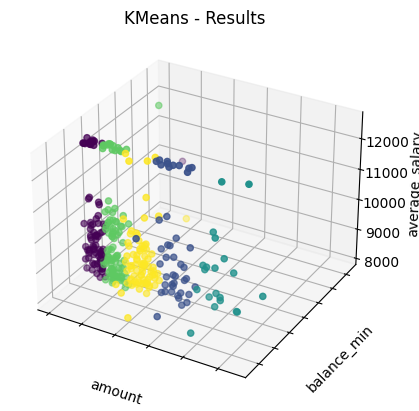

In [5]:
apply_model(KMeans(n_clusters=5), features=features)

## Affinity Propagation Clustering

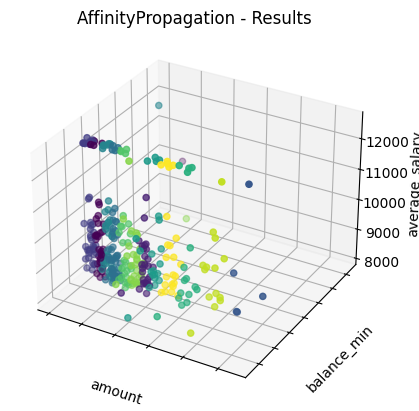

In [6]:
apply_model(AffinityPropagation(max_iter=600, damping=0.90), features=features)

## Gaussian Mixture Clustering

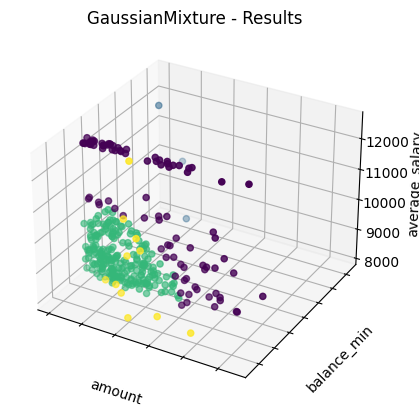

In [7]:
apply_model(GaussianMixture(n_components=4), features=features)